In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
m = 100
x1 = 8*np.random.rand(m, 1)
x2 = 7*np.random.rand(m, 1) - 4 # 원래 꽉차게 데이터가 나오는데, 중간이 비게끔 설정한것

f = 0.8*x1 + x2 - 3

In [5]:
C1 = np.where(f >= 1)
C0 = np.where(f < -1)
print(C1)
print(C0)
     

(array([ 5,  7,  8,  9, 10, 14, 17, 23, 26, 30, 35, 37, 44, 45, 46, 47, 48,
       53, 57, 59, 64, 66, 69, 73, 79, 82, 83, 88, 89, 99], dtype=int64), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64))
(array([ 0,  3,  6, 16, 21, 22, 24, 28, 29, 31, 32, 34, 39, 40, 42, 50, 51,
       56, 58, 60, 63, 68, 70, 71, 72, 74, 75, 76, 77, 78, 80, 81, 86, 87,
       90, 91, 93, 94, 97], dtype=int64), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64))


In [7]:
C1 = np.where(f >= 1)[0]
C0 = np.where(f < -1)[0]
print(C1)
print(C0)
print(C1.shape) #C1으로 들어간 개수
print(C0.shape) #C2로 들어간 개수
# 두개 더하면 100개가 안됨 왜? 맨위에서 중간걸 빼서
     

[ 5  7  8  9 10 14 17 23 26 30 35 37 44 45 46 47 48 53 57 59 64 66 69 73
 79 82 83 88 89 99]
[ 0  3  6 16 21 22 24 28 29 31 32 34 39 40 42 50 51 56 58 60 63 68 70 71
 72 74 75 76 77 78 80 81 86 87 90 91 93 94 97]
(30,)
(39,)


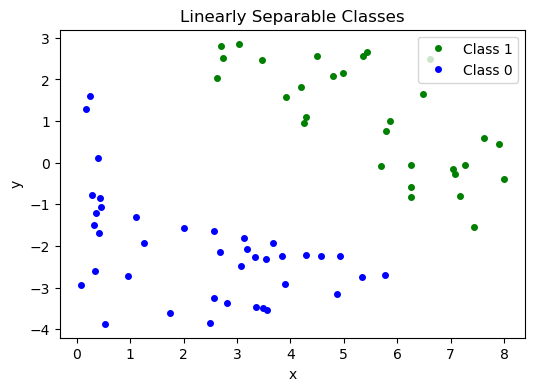

In [9]:
plt.figure(figsize = (6, 4))
plt.plot(x1[C1], x2[C1], 'go', markersize = 4, label = 'Class 1')
plt.plot(x1[C0], x2[C0], 'bo', markersize = 4, label = 'Class 0')
plt.title('Linearly Separable Classes')
plt.legend(loc = 1)
plt.xlabel(r'x')
plt.ylabel(r'y')
plt.show()

In [11]:
X1 = np.hstack([np.ones([C1.shape[0],1]), x1[C1], x2[C1]])
X0 = np.hstack([np.ones([C0.shape[0],1]), x1[C0], x2[C0]])
X = np.vstack([X1, X0])

y = np.vstack([np.ones([C1.shape[0],1]), -np.ones([C0.shape[0],1])])

X = np.asmatrix(X)
y = np.asmatrix(y)

In [13]:
X1.shape
     

(30, 3)

In [15]:
w = np.ones([3,1])
w = np.asmatrix(w)

n_iter = y.shape[0]
for k in range(n_iter):
    for i in range(n_iter):
        if y[i,0] != np.sign(X[i,:]*w)[0,0]:
            w += y[i,0]*X[i,:].T

print(w)

[[-8.        ]
 [ 2.35752522]
 [ 3.97123381]]


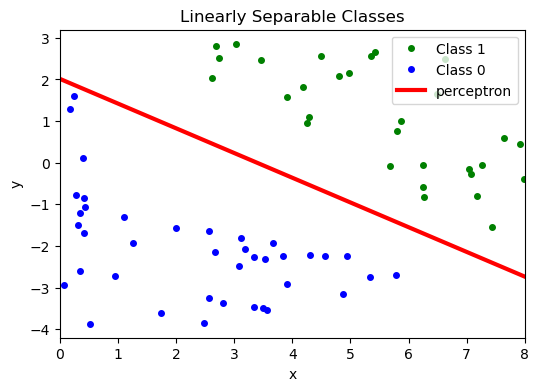

In [17]:
x1p = np.linspace(0,8,100).reshape(-1,1)
x2p = - w[1,0]/w[2,0]*x1p - w[0,0]/w[2,0]

plt.figure(figsize = (6, 4))
plt.plot(x1[C1], x2[C1], 'go', markersize = 4, label = 'Class 1')
plt.plot(x1[C0], x2[C0], 'bo', markersize = 4, label = 'Class 0')
plt.plot(x1p, x2p, c = 'r', linewidth = 3, label = 'perceptron')
plt.title('Linearly Separable Classes')
plt.xlim([0, 8])
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = 1)
plt.show()